In [ ]:
import numpy as np  # Import library numpy untuk operasi numerik
import pandas as pd  # Import library pandas untuk manipulasi data
import tensorflow as tf

In [ ]:
import json  # Import library json untuk membaca data dari file JSON

with open('dataset.json', 'r') as f:
    data = json.load(f)  # Membaca data dari file JSON dan menyimpannya dalam variabel 'data'

df = pd.DataFrame(data['intents'])  # Membuat DataFrame dari bagian 'intents' dalam data JSON
df

,tag,patterns,responses
0,greeting,"[Hai, Hey, Apakah ada orang di sini?, Woy, Hel...",[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,morning,"[Pagi, Selamat pagi, Morning, Good morning]",[Selamat pagi. Saya harap tidur malam Anda nye...
2,afternoon,"[Siang, Selamat siang, Afternoon, Good afternoon]","[Selamat siang. Bagaimana harimu?, Hai, semoga..."
3,evening,"[Selamat malam, Malam, Evening]","[Selamat malam. Bagaimana harimu?, Hai, semoga..."
4,night,"[Selamat malam, Malam, Night, Good night]","[Selamat malam. Tidurlah yang nyenyak, Selamat..."
...,...,...,...
79,fact-31,"[Apa perbedaan antara kecemasan dan stres?, Ba...",[Stres dan kecemasan sering digunakan secara b...
80,fact-32,"[Apa perbedaan antara kesedihan dan depresi?, ...",[Kesedihan adalah reaksi normal terhadap kehil...
81,fact-33,[Apa saja tanda-tanda gangguan kecemasan umum?...,[Gangguan kecemasan umum ditandai oleh kecemas...
82,fact-34,"[Bagaimana cara mengatasi perasaan putus asa?,...",[Mengatasi perasaan putus asa bisa menjadi pro...


In [ ]:
dic = {"tag":[], "patterns":[], "responses":[]}  # Membuat dictionary kosong untuk menyimpan data yang akan diubah ke DataFrame
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]  # Mengambil pola (patterns) dari DataFrame
    rspns = df[df.index == i]['responses'].values[0]  # Mengambil respons dari DataFrame
    tag = df[df.index == i]['tag'].values[0]  # Mengambil tag dari DataFrame
    for j in range(len(ptrns)):
        dic['tag'].append(tag)  # Menambahkan tag ke dalam dictionary
        dic['patterns'].append(ptrns[j])  # Menambahkan pola ke dalam dictionary
        dic['responses'].append(rspns)  # Menambahkan respons ke dalam dictionary

df = pd.DataFrame.from_dict(dic)  # Membuat DataFrame baru dari dictionary
pd.set_option("display.max_rows", None)  # Menampilkan semua baris DataFrame ketika ditampilkan
df  # Menampilkan DataFrame


,tag,patterns,responses
0,greeting,Hai,[Halo. Ceritakan bagaimana perasaanmu hari ini...
1,greeting,Hey,[Halo. Ceritakan bagaimana perasaanmu hari ini...
2,greeting,Apakah ada orang di sini?,[Halo. Ceritakan bagaimana perasaanmu hari ini...
3,greeting,Woy,[Halo. Ceritakan bagaimana perasaanmu hari ini...
4,greeting,Hello,[Halo. Ceritakan bagaimana perasaanmu hari ini...
5,greeting,Halo,[Halo. Ceritakan bagaimana perasaanmu hari ini...
6,greeting,Howdy,[Halo. Ceritakan bagaimana perasaanmu hari ini...
7,greeting,Hola,[Halo. Ceritakan bagaimana perasaanmu hari ini...
8,greeting,Bonjour,[Halo. Ceritakan bagaimana perasaanmu hari ini...
9,greeting,Konnichiwa,[Halo. Ceritakan bagaimana perasaanmu hari ini...


In [ ]:
df.to_excel('dataset.xlsx', index=False)

In [ ]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-4', 'fact-5', 'fact-6', 'fact-7', 'fact-8',
       'fact-9', 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14',
       'fact-15', 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20',
       'fact-21', 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26',
       'fact-27', 'fact-28', 'f

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 524,
 'word_counts': '{"hai": 1, "hey": 1, "apakah": 97, "ada": 66, "orang": 10, "di": 24, "sini": 1, "woy": 1, "hello": 1, "halo": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "apa": 102, "kabar": 1, "pagi": 2, "selamat": 7, "morning": 2, "good": 3, "siang": 2, "afternoon": 2, "malam": 4, "evening": 1, "night": 2, "tinggal": 3, "sampai": 5, "jumpa": 5, "lagi": 13, "au": 1, "revoir": 1, "sayonara": 1, "oke": 3, "jalan": 1, "besok": 1, "bertemu": 2, "lain": 13, "waktu": 3, "terima": 5, "kasih": 5, "makasih": 1, "sangat": 15, "membantu": 12, "untuk": 99, "bantuannya": 1, "banyak": 14, "thank": 1, "you": 1, "tidak": 72, "yang": 186, "menarik": 1, "siapa": 18, "kamu": 34, "itu": 23, "ceritakan": 4, "padaku": 1, "lebih": 17, "tentang": 37, "dirimu": 2, "namamu": 2, "aku": 53, "harus": 3

In [ ]:
vocab_size = len(tokenizer.word_index)  # Menghitung jumlah kata unik dalam tokenizer
print('number of unique words = ', vocab_size)  # Menampilkan jumlah kata unik

number of unique words =  578


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])  # Mengonversi teks pola menjadi urutan angka
X = pad_sequences(ptrn2seq, padding='post')  # Melakukan padding terhadap urutan angka
print('X shape = ', X.shape)  # Menampilkan bentuk (shape) dari X

lbl_enc = LabelEncoder()  # Membuat objek LabelEncoder
y = lbl_enc.fit_transform(df['tag'])  # Mengonversi label kelas menjadi angka
print('y shape = ', y.shape)  # Menampilkan bentuk (shape) dari y
print('num of classes = ', len(np.unique(y)))  # Menampilkan jumlah kelas unik

X shape =  (524, 28)
y shape =  (524,)
num of classes =  84


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)

# Transformasi data target menjadi angka
y_encoded = label_encoder.transform(y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 100)           57900     
                                                                 
 lstm (LSTM)                 (None, 28, 32)            17024     
                                                                 
 layer_normalization (Layer  (None, 28, 32)            64        
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 28, 32)            8320      
                                                                 
 layer_normalization_1 (Lay  (None, 28, 32)            64        
 erNormalization)                                                
                                                                 
 lstm_2 (LSTM)               (None, 32)                8

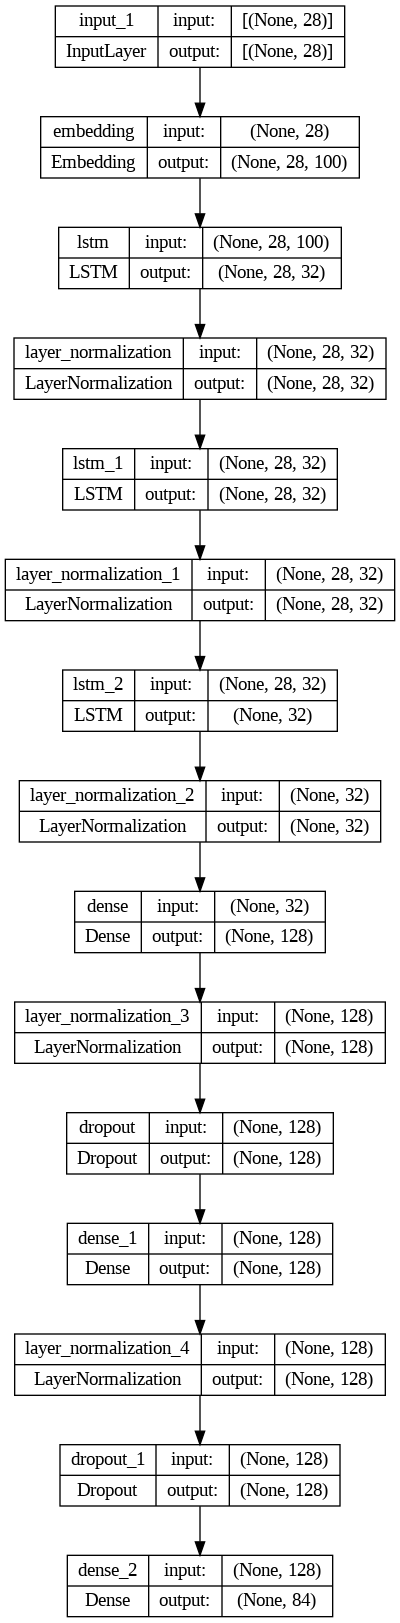

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.regularizers import l2  # Import l2 regularizer from tensorflow.keras.regularizers
from tensorflow.keras.utils import plot_model
import numpy as np  # Make sure to import numpy if it's not already imported

model = Sequential()

model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vocab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(LSTM(32, kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.001)))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [ ]:
model_history = model.fit(x=X,  # Data input X
                          y=y,  # Data output y
                          batch_size=10,  # Ukuran batch yang digunakan dalam setiap iterasi
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],  # Menggunakan EarlyStopping untuk menghentikan pelatihan jika akurasi tidak meningkat setelah 3 epoch
                          # Dihentikan agar tidak terciptanya overfitting
                          epochs=50)  # Jumlah epoch (iterasi) pelatihan


Epoch 1/50
53/53 [==============================] - 19s 68ms/step - loss: 5.0110 - accuracy: 0.0267
Epoch 2/50
53/53 [==============================] - 3s 53ms/step - loss: 3.9601 - accuracy: 0.1565
Epoch 3/50
53/53 [==============================] - 3s 48ms/step - loss: 3.1003 - accuracy: 0.3130
Epoch 4/50
53/53 [==============================] - 3s 47ms/step - loss: 2.5676 - accuracy: 0.4427
Epoch 5/50
53/53 [==============================] - 3s 49ms/step - loss: 2.0486 - accuracy: 0.5611
Epoch 6/50
53/53 [==============================] - 4s 71ms/step - loss: 1.6270 - accuracy: 0.6889
Epoch 7/50
53/53 [==============================] - 3s 48ms/step - loss: 1.2981 - accuracy: 0.7786
Epoch 8/50
53/53 [==============================] - 3s 48ms/step - loss: 1.0919 - accuracy: 0.8454
Epoch 9/50
53/53 [==============================] - 3s 49ms/step - loss: 0.9426 - accuracy: 0.8645
Epoch 10/50
53/53 [==============================] - 3s 59ms/step - loss: 0.7982 - accuracy: 0.8931
Epoch 11

In [ ]:
import re
import random

def inputan_user():
    pattern = input("You: ")  # Menerima input dari pengguna
    # Preprocess input pattern
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)  # Menghapus karakter selain huruf dan tanda kutip dari pattern
    txt = txt.lower()  # Mengonversi pattern menjadi huruf kecil
    txt = txt.split()  # Membagi pattern menjadi kata-kata
    txt = " ".join(txt)  # Menggabungkan kata-kata kembali menjadi teks
    text.append(txt)  # Menambahkan teks ke dalam list

    # Tokenize and pad the input pattern
    x_test = tokenizer.texts_to_sequences(text)  # Mengonversi teks input pengguna menjadi urutan angka
    x_test = np.array(x_test).squeeze()  # Mengonversi ke dalam array dan menghapus dimensi yang tidak perlu
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])  # Melakukan padding terhadap urutan angka

    # Make prediction using the model
    y_pred = model.predict(x_test)  # Memprediksi kelas dengan model yang telah dilatih
    y_pred = y_pred.argmax()  # Mengambil indeks kelas dengan nilai probabilitas tertinggi
    tag = lbl_enc.inverse_transform([y_pred])[0]  # Mengonversi indeks kelas kembali menjadi label kelas
    responses = df[df['tag'] == tag]['responses'].values[0]  # Mengambil respons berdasarkan label kelas

    # Display user input and bot response
    print(" BOT : {}".format(random.choice(responses)))  # Menampilkan respons bot secara acak dari respons yang tersedia


# Loop untuk interaksi dengan pengguna
while True:
    inputan_user()
    if input("Continue? (y/n): ").strip().lower() != 'y':
        print('Selamat tinggal! Saya selalu ada disini untuk membantu Anda')
        break

You: halo apa kabar?
1/1 [==============================] - 0s 28ms/step
 BOT : Hai. Bagaimana perasaanmu hari ini?
Continue? (y/n): y
You: apa yang bisa kamu lakukan?
1/1 [==============================] - 0s 29ms/step
 BOT : Saya dapat membantu Anda dengan pertanyaan atau perasaan yang Anda miliki saat ini, memberikan dukungan dan saran yang diperlukan, dan melakukan percakapan yang menghibur dan mendukung.
Continue? (y/n): y
You: Saya tertarik untuk belajar tentang kesehatan mental.
1/1 [==============================] - 0s 28ms/step
 BOT : Oh itu sangat bagus. Saya akan bersedia menjawab apa pun yang saya ketahui tentang hal itu.
Continue? (y/n): y
You: Apakah suasana hati saya menunjukkan tanda-tanda Depresi?
1/1 [==============================] - 0s 35ms/step
 BOT : Untuk diagnosis depresi, seseorang perlu mengalami suasana hati rendah atau kehilangan minat atau kesenangan dalam hidup setidaknya selama 2 minggu. Selain itu, mereka akan mengalami gejala-gejala berikut: perasaan se

In [ ]:
from tensorflow.keras.models import save_model

# Simpan model ke dalam file .h5
save_model(model, 'model_chatbot.h5')

<ipython-input-14-29eb873c1095>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'model_chatbot.h5')
